In [ ]:
# get some quantum programs

In [1]:
import qiskit
import matplotlib.pyplot as plt

In [2]:
# initialization
import numpy as np

# importing Qiskit
from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, assemble, transpile

# import basic plot tools
from qiskit.visualization import plot_histogram

In [3]:
# set the length of the n-bit input string. 
n = 3

const_oracle = QuantumCircuit(n+1)

output = np.random.randint(2)
if output == 1:
    const_oracle.x(n)

const_oracle.draw()

q_0: 
     
q_1: 
     
q_2: 
     
q_3:

In [4]:
balanced_oracle = QuantumCircuit(n+1)
b_str = "101"

# Place X-gates
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)

# Use barrier as divider
balanced_oracle.barrier()

# Controlled-NOT gates
for qubit in range(n):
    balanced_oracle.cx(qubit, n)

balanced_oracle.barrier()

# Place X-gates
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)

# Show oracle
balanced_oracle.draw()

┌───┐ ░                 ░ ┌───┐
q_0: ┤ X ├─░───■─────────────░─┤ X ├
     └───┘ ░   │             ░ └───┘
q_1: ──────░───┼────■────────░──────
     ┌───┐ ░   │    │        ░ ┌───┐
q_2: ┤ X ├─░───┼────┼────■───░─┤ X ├
     └───┘ ░ ┌─┴─┐┌─┴─┐┌─┴─┐ ░ └───┘
q_3: ──────░─┤ X ├┤ X ├┤ X ├─░──────
           ░ └───┘└───┘└───┘ ░

In [5]:
dj_circuit = QuantumCircuit(n+1, n)

# Apply H-gates
for qubit in range(n):
    dj_circuit.h(qubit)

# Put qubit in state |->
dj_circuit.x(n)
dj_circuit.h(n)
dj_circuit.draw()

┌───┐     
q_0: ┤ H ├─────
     ├───┤     
q_1: ┤ H ├─────
     ├───┤     
q_2: ┤ H ├─────
     ├───┤┌───┐
q_3: ┤ X ├┤ H ├
     └───┘└───┘
c: 3/══════════

In [6]:
dj_circuit = QuantumCircuit(n+1, n)

# Apply H-gates
for qubit in range(n):
    dj_circuit.h(qubit)

# Put qubit in state |->
dj_circuit.x(n)
dj_circuit.h(n)

# Add oracle
dj_circuit += balanced_oracle
dj_circuit.draw()

/tmp/ipykernel_46306/525878989.py:12: DeprecationWarning: The QuantumCircuit.__iadd__() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.
  dj_circuit += balanced_oracle
/home/paltenmo/.conda/envs/ML4Quantum/lib/python3.8/site-packages/qiskit/circuit/quantumcircuit.py:942: DeprecationWarning: The QuantumCircuit.extend() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.
  return self.extend(rhs)


┌───┐┌───┐ ░                 ░ ┌───┐
q_0: ┤ H ├┤ X ├─░───■─────────────░─┤ X ├
     ├───┤└───┘ ░   │             ░ └───┘
q_1: ┤ H ├──────░───┼────■────────░──────
     ├───┤┌───┐ ░   │    │        ░ ┌───┐
q_2: ┤ H ├┤ X ├─░───┼────┼────■───░─┤ X ├
     ├───┤├───┤ ░ ┌─┴─┐┌─┴─┐┌─┴─┐ ░ └───┘
q_3: ┤ X ├┤ H ├─░─┤ X ├┤ X ├┤ X ├─░──────
     └───┘└───┘ ░ └───┘└───┘└───┘ ░      
c: 3/════════════════════════════════════

In [7]:
dj_circuit = QuantumCircuit(n+1, n)

# Apply H-gates
for qubit in range(n):
    dj_circuit.h(qubit)

# Put qubit in state |->
dj_circuit.x(n)
dj_circuit.h(n)

# Add oracle
dj_circuit += balanced_oracle

# Repeat H-gates
for qubit in range(n):
    dj_circuit.h(qubit)
dj_circuit.barrier()

# Measure
for i in range(n):
    dj_circuit.measure(i, i)

# Display circuit
dj_circuit.draw()

┌───┐┌───┐ ░                 ░ ┌───┐┌───┐ ░ ┌─┐      
q_0: ┤ H ├┤ X ├─░───■─────────────░─┤ X ├┤ H ├─░─┤M├──────
     ├───┤└───┘ ░   │             ░ ├───┤└───┘ ░ └╥┘┌─┐   
q_1: ┤ H ├──────░───┼────■────────░─┤ H ├──────░──╫─┤M├───
     ├───┤┌───┐ ░   │    │        ░ ├───┤┌───┐ ░  ║ └╥┘┌─┐
q_2: ┤ H ├┤ X ├─░───┼────┼────■───░─┤ X ├┤ H ├─░──╫──╫─┤M├
     ├───┤├───┤ ░ ┌─┴─┐┌─┴─┐┌─┴─┐ ░ └───┘└───┘ ░  ║  ║ └╥┘
q_3: ┤ X ├┤ H ├─░─┤ X ├┤ X ├┤ X ├─░────────────░──╫──╫──╫─
     └───┘└───┘ ░ └───┘└───┘└───┘ ░            ░  ║  ║  ║ 
c: 3/═════════════════════════════════════════════╩══╩══╩═
                                                  0  1  2

/home/paltenmo/.conda/envs/ML4Quantum/lib/python3.8/site-packages/qiskit/utils/deprecation.py:62: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  return func(*args, **kwargs)


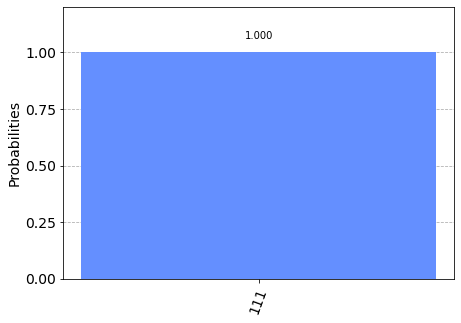

In [8]:

# use local simulator
aer_sim = Aer.get_backend('aer_simulator')
shots = 1024
qobj = assemble(dj_circuit, aer_sim)
results = aer_sim.run(qobj).result()
answer = results.get_counts()

plot_histogram(answer)

# Genetic Algorithms

In [9]:
# create an encoding form gates > to circuit

# (gate_id, qubit_index, parameter_1, parameter_2)

# fitness function > length of the circuit + skewed probability 

In [12]:
import random
from deap import creator, base, tools, algorithms

creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()

# original 
# toolbox.register("attr_bool", random.randint, 0, 1)
toolbox.register("attr_bool", random.random)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=100)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

def evalOneMax(individual):
    return sum(individual),

toolbox.register("evaluate", evalOneMax)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

population = toolbox.population(n=300)

NGEN = 400
for gen in range(NGEN):
    offspring = algorithms.varAnd(population, toolbox, cxpb=0.5, mutpb=0.1)
    fits = toolbox.map(toolbox.evaluate, offspring)
    for fit, ind in zip(fits, offspring):
        ind.fitness.values = fit
    population = toolbox.select(offspring, k=len(population))
top10 = tools.selBest(population, k=10)

In [13]:
sum(top10[0])

79.91793389598631

## Quantum encoding

In [14]:
lst = np.random.rand(100)
n = 3
[lst[i:i + n] for i in range(0, len(lst), n)]

[array([0.17203165, 0.71852791, 0.96536681]),
 array([0.80524233, 0.02540824, 0.65680808]),
 array([0.91371831, 0.59793659, 0.7170851 ]),
 array([0.16539594, 0.36706845, 0.12949823]),
 array([0.11874269, 0.37652608, 0.61160441]),
 array([0.15570444, 0.74078314, 0.45401727]),
 array([0.71794894, 0.69755574, 0.45041893]),
 array([0.55691334, 0.09333888, 0.02953974]),
 array([0.29564149, 0.45945166, 0.66116248]),
 array([0.84970646, 0.33686032, 0.90060488]),
 array([0.50289958, 0.41216203, 0.42089836]),
 array([0.31531208, 0.49237835, 0.39401424]),
 array([0.63133492, 0.50391169, 0.49130904]),
 array([0.80362493, 0.19011524, 0.83046698]),
 array([0.36931079, 0.740318  , 0.67403457]),
 array([0.61554252, 0.27550855, 0.53438675]),
 array([0.24520739, 0.88572502, 0.48842235]),
 array([0.86293031, 0.02013637, 0.29786758]),
 array([0.78557843, 0.66373861, 0.89700666]),
 array([0.32046158, 0.56478916, 0.71713845]),
 array([0.42225682, 0.88847428, 0.35016743]),
 array([0.67787515, 0.38136165, 0.

In [15]:
from qiskit.circuit import qpy_serialization
from typing import List
import math

gate_set = [
   "cx", "x", "y", "z", "p"
]


def encoding_to_circuit(encoding: List[float], n_qubits: int, classical_input: int = None):
    """Convert encoding to a real circuit.
    
    We have a list to encode the single operation, the final list looks like:
    (0.23, 0.75, 0.76, 0.44, etc)
    (gate_type, qubit, parameter, gate_type, qubit, parameter, etc...)
    The single operation is made of three floats: 
    (gate_type, qubit, parameter)
    The first float encodes the gate. We divide the interval uniformly 
    on the available gates:
    - CNOT
    - pauli X
    - pauli Y
    - pauli Z
    - pahse shift
    The second float encodes the qubit on which it applies to. We divide the
    interval uniformly on the available qubits.
    The third float is used only by:
    - cnot gate: to select a target qubit (similarly to the first flaot)
    - phase shift: to select the rotation
    Based on the second digit we decide on which qubit it acts on
    
    """
    
    # quantum registers, and classical registers
    qc = QuantumCircuit(n_qubits, n_qubits)
    qubits = range(n_qubits)
    
    
    if classical_input != None:
        assert isinstance(classical_input, int)
        format_string = "{0:" + str(n_qubits) + "b}"
        string_input = format_string.format(classical_input).zfill(n_qubits)
        for i, c in enumerate(string_input):
            if c == "1": 
                qc.x(i)
    
    qc.barrier()
    
    # get the single chunks
    n = 3  # number of parameters per operation
    chunks = [encoding[i:i + n] for i in range(0, len(encoding), n)]
    for op in chunks:
        # discard incomplete sequences
        if len(op) != 3: 
            continue
        # get the type of gate
        op_type = gate_set[int(op[0] / (float(1) / (len(gate_set))))]
        #print(op_type, " : ", op[0])
        method_to_call = getattr(qc, op_type)
        
        
        # get target qubit
        qubit = qubits[int(op[1] / (float(1) / (len(qubits))))]
        #print(qubit, " : ", op[1])
        
        # extra parameter
        if op_type == "cx":
            # get second target qubit
            second_target_qubit = qubits[int(op[2] / (float(1) / (len(qubits))))]
            #print(second_target_qubit, " : ", op[2])
            method_to_call(qubit, second_target_qubit)
        elif op_type == "p":
            # get rotation parameter
            parameter = 2 * math.pi * op[2]
            #print(parameter, " : ", op[2])
            method_to_call(parameter, qubit)
        else:
            # call the simple X, Y, Z gate on a single qubit
            method_to_call(qubit)
            
    qc.barrier()
    # Measure
    for i in range(n_qubits):
        qc.measure(i, i)
    return qc
    
random_circuit = encoding_to_circuit(lst, n_qubits=10, classical_input=30)

random_circuit.draw()

░ ┌───────────┐   ┌───┐    ┌───────────┐┌───┐                  »
 q_0: ──────░─┤ P(4.1268) ├───┤ Y ├────┤ P(1.8716) ├┤ Z ├──────────────────»
            ░ └───┬───┬───┘┌──┴───┴───┐└───────────┘└───┘             ┌───┐»
 q_1: ──────░─────┤ X ├────┤ P(5.218) ├───────────────────────────────┤ X ├»
            ░     └─┬─┘    └──┬───┬───┘                               └─┬─┘»
 q_2: ──────░───────┼─────────┤ Z ├─────────────────────────────────────┼──»
            ░       │         └───┘    ┌───────────┐┌───┐               │  »
 q_3: ──────░───────■───────────■──────┤ P(5.6587) ├┤ Z ├───────────────┼──»
            ░                   │      └───┬───┬───┘├───┤    ┌───┐      │  »
 q_4: ──────░───────────────────┼──────────┤ X ├────┤ X ├────┤ Y ├──────┼──»
      ┌───┐ ░ ┌───────────┐     │          └─┬─┘    ├───┤    ├───┤      │  »
 q_5: ┤ X ├─░─┤ P(4.5056) ├─────┼────────────┼──────┤ Z ├────┤ X ├──────■──»
      ├───┤ ░ └───────────┘   ┌─┴─┐          │      ├───┤    ├───┤    ┌───┐»
 q_6: ┤ X ├─░─────────────────┤ X ├──────────┼──────┤ Z ├────┤ Z ├────┤ Y ├»
      ├───┤ ░                 └───┘          │      ├───┤┌───┴───┴───┐└───┘»
 q_7: ┤ X ├─░───────■────────────────────────■──────┤ X ├┤ P(5.4504) ├─────»
      ├───┤ ░       │         ┌───┐        ┌───┐    └───┘└───────────┘     »
 q_8: ┤ X ├─░───────┼─────────┤ X ├────────┤ Y ├───────────────────────────»
      └───┘ ░     ┌─┴─┐       └───┘        └───┘                           »
 q_9: ──────░─────┤ X ├────────────────────────────────────────────────────»
            ░     └───┘                                                    »
c: 10/═════════════════════════════════════════════════════════════════════»
                                                                           »
«                                ░ ┌─┐                           
« q_0: ─────────────────■────■───░─┤M├───────────────────────────
«           ┌───┐       │  ┌─┴─┐ ░ └╥┘┌─┐                        
« q_1: ─────┤ X ├───────┼──┤ X ├─░──╫─┤M├────────────────────────
«           └─┬─┘       │  └───┘ ░  ║ └╥┘┌─┐                     
« q_2: ───────┼─────────┼────────░──╫──╫─┤M├─────────────────────
«             │         │        ░  ║  ║ └╥┘┌─┐                  
« q_3: ───────┼─────────┼────────░──╫──╫──╫─┤M├──────────────────
«      ┌───┐  │         │        ░  ║  ║  ║ └╥┘┌─┐               
« q_4: ┤ X ├──┼─────────┼────────░──╫──╫──╫──╫─┤M├───────────────
«      └───┘  │         │        ░  ║  ║  ║  ║ └╥┘┌─┐            
« q_5: ───────┼─────────┼────────░──╫──╫──╫──╫──╫─┤M├────────────
«      ┌───┐  │         │        ░  ║  ║  ║  ║  ║ └╥┘┌─┐         
« q_6: ┤ Z ├──┼────■────┼────────░──╫──╫──╫──╫──╫──╫─┤M├─────────
«      └───┘  │  ┌─┴─┐  │        ░  ║  ║  ║  ║  ║  ║ └╥┘┌─┐      
« q_7: ───────┼──┤ X ├──┼────────░──╫──╫──╫──╫──╫──╫──╫─┤M├──────
«             │  └───┘  │  ┌───┐ ░  ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐   
« q_8: ───────┼─────────┼──┤ X ├─░──╫──╫──╫──╫──╫──╫──╫──╫─┤M├───
«             │  ┌───┐┌─┴─┐└─┬─┘ ░  ║  ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐
« q_9: ───────■──┤ Z ├┤ X ├──■───░──╫──╫──╫──╫──╫──╫──╫──╫──╫─┤M├
«                └───┘└───┘      ░  ║  ║  ║  ║  ║  ║  ║  ║  ║ └╥┘
«c: 10/═════════════════════════════╩══╩══╩══╩══╩══╩══╩══╩══╩══╩═
«                                   0  1  2  3  4  5  6  7  8  9

In [18]:
print(random_circuit.qasm())

OPENQASM 2.0;
include "qelib1.inc";
qreg q[10];
creg c[10];
x q[5];
x q[6];
x q[7];
x q[8];
barrier q[0],q[1],q[2],q[3],q[4],q[5],q[6],q[7],q[8],q[9];
cx q[7],q[9];
p(4.1268469) q[0];
p(4.5055786) q[5];
cx q[3],q[1];
cx q[3],q[6];
cx q[7],q[4];
z q[6];
y q[0];
x q[4];
p(5.6586673) q[3];
y q[4];
x q[4];
z q[5];
p(5.2179779) q[1];
x q[7];
z q[2];
x q[8];
p(1.8715572) q[0];
z q[6];
x q[5];
y q[8];
z q[3];
cx q[5],q[1];
cx q[9],q[1];
z q[0];
z q[9];
y q[6];
p(5.4504332) q[7];
cx q[0],q[9];
cx q[0],q[1];
z q[6];
cx q[9],q[8];
cx q[6],q[7];
barrier q[0],q[1],q[2],q[3],q[4],q[5],q[6],q[7],q[8],q[9];
measure q[0] -> c[0];
measure q[1] -> c[1];
measure q[2] -> c[2];
measure q[3] -> c[3];
measure q[4] -> c[4];
measure q[5] -> c[5];
measure q[6] -> c[6];
measure q[7] -> c[7];
measure q[8] -> c[8];
measure q[9] -> c[9];



In [66]:
#with open('random_.qpy', 'wb') as fd:
#   qpy_serialization.dump(random_circuit, fd)

In [149]:
AER_SIM = Aer.get_backend('aer_simulator')
from IPython.display import display

def binaryToDecimal(val): 
    if str(val).strip() == "":
        return 0
    return int(val, 2) 

def decToBin(val, n_bits):
    format_string = "{0:" + str(n_bits) + "b}"
    string_input = format_string.format(val).zfill(n_bits)
    return str(string_input)

def evaluate(encoding, classical_input, verbose=1):
    random_circuit = encoding_to_circuit(lst, n_qubits=10, classical_input=classical_input)
    if verbose > 1: 
        display(random_circuit.draw())
    # use local simulator
    shots = 1024
    #qobj = assemble(random_circuit, AER_SIM)
    #results = AER_SIM.run(qobj).result()
    results = AER_SIM.run(random_circuit).result()
    answer = dict(results.get_counts())
    if verbose > 1: 
        plot_histogram(answer)
    keys, values = [], []
    if verbose > 0:
        print("Options")
    for k, v in answer.items():
        dec_key = binaryToDecimal(k)
        if verbose > 0:
            print(f"{dec_key} : {v}")
        keys.append(dec_key)
        values.append(v)
    max_result = keys[np.argmax(values)]
    return max_result

In [133]:
from sklearn.metrics import mean_squared_error
y_true = [3, -0.5, 2, 7]
>>> y_pred = [2.5, 0.0, 2, 8]
>>> mean_squared_error(y_true, y_pred)

SyntaxError: invalid syntax (439036512.py, line 3)

In [139]:
import random
from sklearn.metrics import mean_squared_error

dec_input = []
y_pred = []
x_add_1 = []
x_add_2 = []
y_true = []

n_bits = 10
n_sample = 30

random.seed(42)

for i in random.sample(range(2**n_bits), n_sample): # sample 
    # transform the decimal value in the binary and the split the binary string 
    # to get two numbers
    bitstring = decToBin(i, n_bits)
    half_bits = int(n_bits / 2)
    first_addendum = binaryToDecimal(bitstring[:half_bits])
    second_addendum = binaryToDecimal(bitstring[half_bits:])
    x_add_1.append(first_addendum)
    x_add_2.append(second_addendum)
    y_artificial = first_addendum + second_addendum
    y_true.append(y_artificial)
    dec_input.append(i)
    res_y = evaluate(encoding=lst, classical_input=i, verbose=0)
    y_pred.append(res_y)
    
    
df = pd.DataFrame({
    "x_add_1":  x_add_1,
    "x_add_2":  x_add_2,
    "y_pred": y_pred,
    "y_true": y_true,
    "input_as_dec": dec_input,
})

mse = mean_squared_error(y_true, y_pred)
print(f"mse: {mse}")
print(df.shape)
df.head()

/home/paltenmo/.local/share/virtualenvs/ML4Quantum-CjQW4tL4/lib/python3.8/site-packages/qiskit/utils/deprecation.py:62: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  return func(*args, **kwargs)


mse: 339584.8333333333
(30, 5)


,x_add_1,x_add_2,y_pred,y_true,input_as_dec
0,7,4,628,11,228
1,1,19,984,20,51
2,17,19,987,36,563
3,15,21,86,36,501
4,14,9,742,23,457


/home/paltenmo/.local/share/virtualenvs/ML4Quantum-CjQW4tL4/lib/python3.8/site-packages/qiskit/utils/deprecation.py:62: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  return func(*args, **kwargs)


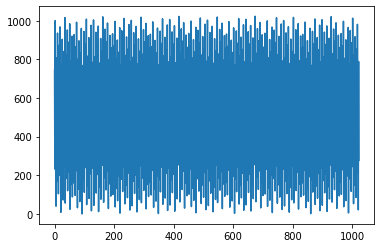

In [114]:
x = []
y = []

for i in range(2**10): #range(2**10):
    x.append(i)
    res_y = evaluate(encoding=lst, classical_input=i, verbose=0)
    y.append(res_y)
    
    
plt.plot(x, y)

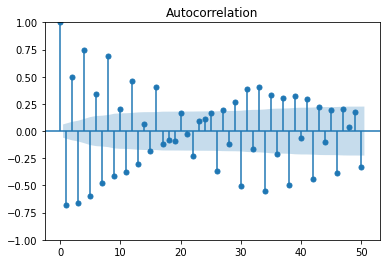

In [115]:
from statsmodels.graphics.tsaplots import plot_acf
# https://www.alpharithms.com/autocorrelation-time-series-python-432909/
import matplotlib.pyplot as plt
# Use the Autocorrelation function
# from the statsmodel library passing
# our DataFrame object in as the data
# Note: Limiting Lags to 50
plot_acf(y, lags=50)
# Show the AR as a plot
plt.show()

# Genetic Algos to learn quantum circuits

In [154]:
import random
from sklearn.metrics import mean_squared_error

def fitness_function(encoding, n_bits=10, n_sample=30, verbose=False):

    dec_input = []
    y_pred = []
    x_add_1 = []
    x_add_2 = []
    y_true = []

    for i in random.sample(range(2**n_bits), n_sample): # sample 
        # transform the decimal value in the binary and the split the binary string 
        # to get two numbers
        bitstring = decToBin(i, n_bits)
        half_bits = int(n_bits / 2)
        first_addendum = binaryToDecimal(bitstring[:half_bits])
        second_addendum = binaryToDecimal(bitstring[half_bits:])
        x_add_1.append(first_addendum)
        x_add_2.append(second_addendum)
        y_artificial = first_addendum + second_addendum
        y_true.append(y_artificial)
        dec_input.append(i)
        res_y = evaluate(encoding=encoding, classical_input=i, verbose=0)
        y_pred.append(res_y)

    if verbose:
        df = pd.DataFrame({
            "x_add_1":  x_add_1,
            "x_add_2":  x_add_2,
            "y_pred": y_pred,
            "y_true": y_true,
            "input_as_dec": dec_input,
        })
        display(df.head())
    mse = mean_squared_error(y_true, y_pred)
    return mse

In [155]:
fitness_function(encoding=lst, n_bits=10, n_sample=30, verbose=False)

291374.4

In [160]:
import random
from tqdm import tqdm
from deap import creator, base, tools, algorithms
from scoop import futures

creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()

# original 
# toolbox.register("attr_bool", random.randint, 0, 1)
toolbox.register("attr_bool", random.random)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=100)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
# change for scoop
#toolbox.register("map",futures.map) # <--------------- overload the map function

def evalOneMax(individual):
    return -fitness_function(encoding=individual, n_bits=10, n_sample=30, verbose=False),

toolbox.register("evaluate", evalOneMax)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

population = toolbox.population(n=300)

NGEN = 40
for gen in tqdm(range(NGEN)):
    offspring = algorithms.varAnd(population, toolbox, cxpb=0.5, mutpb=0.1)
    fits = toolbox.map(toolbox.evaluate, offspring)
    for fit, ind in zip(fits, offspring):
        ind.fitness.values = fit
    population = toolbox.select(offspring, k=len(population))
top10 = tools.selBest(population, k=10)

/home/paltenmo/.local/share/virtualenvs/ML4Quantum-CjQW4tL4/lib/python3.8/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/paltenmo/.local/share/virtualenvs/ML4Quantum-CjQW4tL4/lib/python3.8/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [1:06:06<00:00, 99.17s/it]


In [161]:
best = top10[0]
fitness_function(encoding=best, n_bits=10, n_sample=30, verbose=True)

,x_add_1,x_add_2,y_pred,y_true,input_as_dec
0,11,9,754,20,361
1,25,22,281,47,822
2,26,15,289,41,847
3,14,2,422,16,450
4,9,0,250,9,288


296298.1